In [15]:
import math # for e values 
import matplotlib.pyplot as plt # for graphing
import numpy as np # for graphing

# Problem

An inert form of the bacteria e. coli is commonly used in chemistry and biology research to model how conditions effect living organisms. E. coli grows quickly so it is easy to set up samples for testing. It is recommended that samples are left to grow overnight, appoximately 12 hours. How much bacteria grows when a control sample, room temperature and neutral pH, is left to grow for 12 hours? 

# Variables 

Initial Value ($y_0$)

The amount of e. coli bacteria can widely vary depending on a variety of conditions. In the real world it can depend of factors such as cleanliness and in a lab setting it can depend on factors such as experiment size. For this project, the initial population of $10^{0.6}$ colony forming units (CFUs) comes from an e. coli research article (Vimont et al., 2006). 

In [16]:
initial_population = 10**0.6 # = 3.981071706


Growth rate ($r$)

The growth rate for e. coli ranges from $1.51 h^{-1}$ to $1.86 h^{-1}$ depending on the growth conditions (Vimont et al., 2006). For simplicity, let us say that the growth rate is the average value, $1.685 h^{-1}$. 

In [17]:
growth_rate = 1.685

Carrying Capacity ($K$)

Compition for resoruces is one of the largest limitations to e. coli growth because other bacteria, called backgroud microflora (BM), are using the same limited researces to grow. The carrying capacity is dependant of the inital population of e coli because the ratio of BM and e coli stays relativly stable. With an initial value of $10^{0.6}$ CFU the carrying capacity can range from $10^{6.3}$ to $10^{7.7}$ CFU (Vimont et al., 2006). For simplicity, let's say that the carrying capacity is the average value of $10^7$ CFU.

In [18]:
carrying_cap = 10**7 #= 10,000,000

Time ($t$)

The population of e. coli grows over time from an inital value of $10^{0.6}$ CFU at an inital time of $t = 0$ hours to an unknown value that we are trying to estimate through different methods at a final time of $ t = 12$ hours. 

In [19]:
initial_time = 0
final_time = 12 # value in hours

# Initial Value Problem

$ \frac{dy}{dt} = ry( 1- \frac{y}{K}) $,   $y(0) = y_{0}$

In [20]:
def dy_dt(population:float, growth_rate: float, carrying_cap: int) -> float: 
    """return the derivative of the initial values problem"""
    return ( growth_rate) * population * (1 - (population / carrying_cap)) #initial value equasion

# Euler Method 
$ y_{i}+1 = y_{i} + hf(t_{i},y_{i}) $ <br><br>
$E = \frac{(Mh^{2})}{2}$ <br>
$M = r^{2}K$

In [21]:
#using code demonstrated in class 
def euler_step(population: float, time_step: float, growth_rate:float, carrying_cap: int, rate_of_change: callable) -> float: 
    """return the population size of the next step of Euler's method"""
    return population + (time_step * rate_of_change(population, growth_rate, carrying_cap)) #euler equasion

In [22]:
#using code demonstrated in class 
def euler_step_error(step_size: float, growth_rate:float, carrying_cap:int) -> float: 
    """Return the error for a single step of the euler method"""
    max_second_derivative = (growth_rate**2) * carrying_cap #other terms are 1 - values so the max they can be is 1
    return (max_second_derivative * step_size**2)/2 #error equasion 

In [23]:
#using code demonstrated in class 
def euler_method(initial_population:float, initial_time:int, final_time: int, num_steps: int, growth_rate:float, carrying_cap:int, dy_dt: callable) -> list: 
    """Return a list of populations sizes and errors for each step of the euler method"""
    
    step_size = (final_time - initial_time)/ num_steps # = h
    population = initial_population # = y
    error = 0 #the inital error is 0 because we chose the inital population
    
    population_size = [initial_population] #store values of each step in a list
    pop_size_error = [error] #stores estimated error of each step in a list
    
    for i in range(num_steps): 
        population = euler_step(population, step_size, growth_rate, carrying_cap, dy_dt) # make estimate for next time
        population_size.append(population) #add value to list
        pop_size_error.append(euler_step_error(step_size, growth_rate, carrying_cap)) #calculate error - should be the same for each step 

    return population_size, pop_size_error #error calculation is not needed since we can use the actual answer to calculate error

# Runge-Kutta 

$y_{i+1} = y_{i} + \frac{h}{6}(k_{1} + 2k_{2} +2k_{3} + k_{4})$ 
<br><br>
$k_{1} = f(t_{i}, y_{i})$ <br>
$k_{2} = f(t_{i} + \frac{h}{2}, y_{i} + \frac{h}{2}k_{1})$<br>
$k_{3} = f(t_{i} + \frac{h}{2}, y_{i} + \frac{h}{2}k_{2})$<br>
$k_{3} = f(t_{i} + h, y_{i} + hk_{3})$<br><br>


In [24]:
def runge_kutta_step(population: float, time_step: float, carrying_cap: int, rate_of_change: callable) -> float: 
    """return the population size of the next step using a 4th order Runge Kutta method"""
    k_1 = rate_of_change(population, growth_rate, carrying_cap) #calulate k1 - time is not used in dy_dt so it does not need to be input 
    k_2 = rate_of_change(population + (time_step/2) * k_1, growth_rate, carrying_cap) # calulate k2 
    k_3 = rate_of_change(population + (time_step/2) * k_2, growth_rate, carrying_cap) #calulate k3 
    k_4 = rate_of_change(population + time_step * k_3, growth_rate, carrying_cap) # calculate k4 
    return population + ((time_step/6) * (k_1 + (2* k_2) + (2 *k_3) + k_4)) #runge-kutta equasion

In [25]:
def runge_kutta_4(initial_population:float, initial_time: int, final_time: int, num_steps: int, growth_rate: float, carrying_cap:int, dy_dt: callable) -> list: 
    """Return a list of populations for each step of a the 4th order runge kutta method"""
    step_size = (final_time - initial_time)/ num_steps # = h
    population = initial_population # = y
    
    population_size = [initial_population]
    
    for i in range(num_steps): 
        population = runge_kutta_step(population, step_size, carrying_cap, dy_dt) # make estimate for next step
        population_size.append(population) #add to list
        
    return population_size

# Exact Solution

$y(t) = \frac{Ky_{0}e^{rt}}{K + y_{0}(e^{rt}-1)}$

In [26]:
def exact_growth(intial_population: float, time:int, growth_rate: float, carrying_cap: int) -> float: 
    """return the exact growth of a population"""
    return (carrying_cap * intial_population * math.exp(growth_rate * time))/(carrying_cap + intial_population * (math.exp(growth_rate * time) - 1))

exact_population = exact_growth(initial_population, final_time, growth_rate, carrying_cap)

# Estimations 

In [27]:
num_steps = [100, 1000, 10000]

e_estimates = [] # "mean" of euler
e_errors = [] # deviation of euler 
rk_estimates = [] # "mean" of runge kutta 
rk_errors = [] # devation of runge kutta

for num in num_steps: 
    e_population_estimate = euler_method(initial_population, initial_time, final_time, num, growth_rate, carrying_cap, dy_dt)[0][-1] #make estimate
    e_estimates.append(e_population_estimate) #add to list 
    euler_est_error = euler_method(initial_population, initial_time, final_time, num, growth_rate, carrying_cap, dy_dt)[1][-1]
    euler_error = abs(exact_population - e_population_estimate) # calculate error 
    e_errors.append(euler_error) # add to list 
    rk_population_estimate = runge_kutta_4(initial_population, initial_time, final_time, num, growth_rate, carrying_cap, dy_dt)[-1] #make estimate 
    rk_estimates.append(rk_population_estimate) #add to list 
    rk_error = abs(exact_population - rk_population_estimate) # calculate error
    rk_errors.append(rk_error) #add to list 
    
    print(num,"step(s): ")
    print("Euler:", e_population_estimate, "error of", euler_error, "(estimated :",euler_est_error,")")
    print("Runge-Kutta 4th Order:", rk_population_estimate, "error of", rk_error)
    print("__" * 30) # for a seperation  

print("Exact:", exact_population)

100 step(s): 
Euler: 9889290.309564484 error of 69332.15005237982 (estimated : 204424.2 )
Runge-Kutta 4th Order: 9958614.005719358 error of 8.453897505998611
____________________________________________________________
1000 step(s): 
Euler: 9954566.122748377 error of 4056.3368684872985 (estimated : 2044.2420000000004 )
Runge-Kutta 4th Order: 9958622.45870303 error of 0.0009138341993093491
____________________________________________________________
10000 step(s): 
Euler: 9958235.346348004 error of 387.11326885968447 (estimated : 20.44242 )
Runge-Kutta 4th Order: 9958622.459616762 error of 1.0244548320770264e-07
____________________________________________________________
Exact: 9958622.459616864


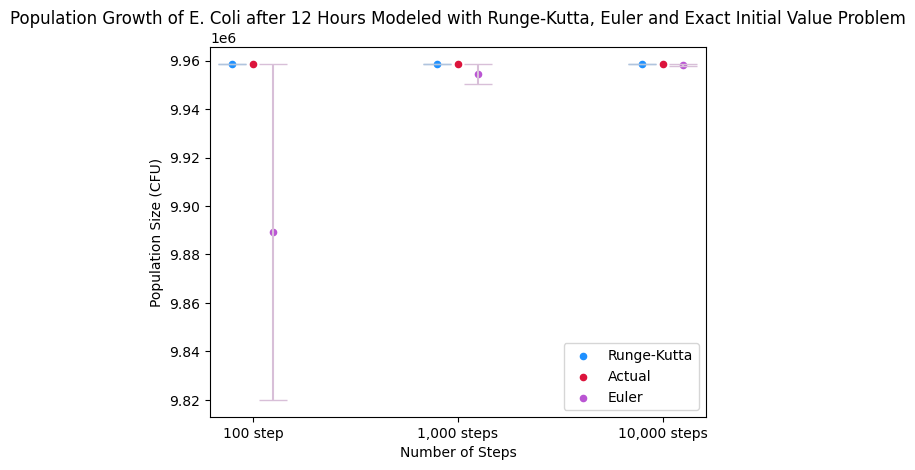

In [28]:
#plot - only shows final points and error 
# help from chatGPT and colors from matplotlib.org
x_axis = ["100 step", "1,000 steps", "10,000 steps"]
methods = ["Runge-Kutta", "Actual", "Euler"]

# create 3 sections 
fig, ax = plt.subplots()
x = np.arange(len(x_axis))

# plot values with error bars 
ax.errorbar(x - 0.1, rk_estimates, yerr= rk_errors, fmt= 'none', color ='lightsteelblue', capsize= 10) #x -/+ shifts over for visibility
ax.errorbar(x, [exact_population, exact_population, exact_population], yerr= 0, fmt= 'none', color ='red', capsize= 0) # capsize controls the size of the end of the error bars - actual has not error so this doesnt actually plot anything 
ax.errorbar(x + 0.1, e_estimates, yerr= e_errors, fmt= 'none', color ='thistle', capsize= 10) #fmt colors shape of points - none means points are not plotted - they are plotted by the scatter plo 

# graph scatter plot so points and error bars can be different colors
ax.scatter(x - 0.1, rk_estimates, color = "dodgerblue", label ="Runge-Kutta", s = 20) # s controls point size 
ax.scatter(x, [exact_population, exact_population, exact_population], color = 'crimson', label = "Actual", s = 20)
ax.scatter(x + 0.1, e_estimates, color = 'mediumorchid', label = 'Euler', s = 20)

#add labels 
ax.set_xticks(x)
ax.set_xticklabels(x_axis) #label sub-catagories in x
ax.set_xlabel("Number of Steps") # label overall x axis
ax.set_ylabel("Population Size (CFU)") #label y axis 
ax.set_title("Population Growth of E. Coli after 12 Hours Modeled with Runge-Kutta, Euler and Exact Initial Value Problem") #title graph
ax.legend() 

plt.show() 

#another possible graph would be using the lists generated from the methods to show each step 


# Write Up

All estimation methods were from provided equations. The intial value problem calculates the change in population given the current population. The Euler and Runge-Kutta estimations work in a stepwise fashion. For the provided number of steps, the method step is called. For the Euler method step, initial value problem is called once and the total population is adjusted. For the Runge-Kutta method step, the initial value problem is called mutiple times to calculate $k$ values and then total population is adjusted. The resulting population from the method step is set as the new population value and the process is repeated. The exact solution uses the inital population and final time to calculate an exact answer. It is the anti-derivative of the inital value problem. 
<br><br>
The variables such as $r$, $K$, $t_i$, $t_f$, and $y_i$ are all constants in this example since they are being pulled from a specific research study. Coding them as mutable variables means that this code can be used to estimate the population of e. coli in with different conditions. Knowing what the population is suppost to be at the end of the growth period allows us to compare how much the sample has actually grown in non-control conditions. If the actual growth is significantly lower than the growth estimate then something may be impeding the e. coli growth. 
<br><br>
The 4th order Runge-Kutta method has a lower error than the Euler method when the same number of steps are taken. The standard used to calculate error is the exact solution. At 100 steps the Euler method has a large error and is far from the actual value while the Runge-Kutta is already very close to the actual with a small error. As the number of steps increases the Euler estimation gets closer to the actual value but it is not a very good estimate until approximatly 10,000 steps are taken. Even then the Euler's error is much higher than Runge-Kutta's. The lower error and the lower number of steps needed suggest that the 4th order Runge-Kutta is a better method for estimating population growth. 
<br><br>

Sources: <br>

>Vimont A, Vernozy-Rozand C, Montet MP, Lazizzera C, Bavai C, Delignette-Muller ML. Modeling and predicting the simultaneous growth of Escherichia coli O157:H7 and ground beef background microflora for various enrichment protocols. Appl Environ Microbiol. 2006 Jan;72(1):261-8. doi: 10.1128/AEM.72.1.261-268.2006. PMID: 16391052; PMCID: PMC1352195.
<br> __https://pmc.ncbi.nlm.nih.gov/articles/PMC1352195/__ 